原图像的大小为: (450, 600)


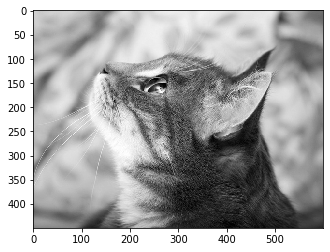

1%的奇异值: 


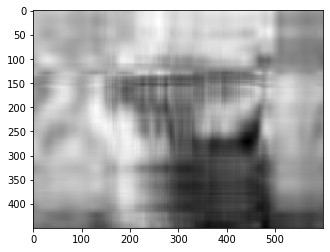

10%的奇异值：


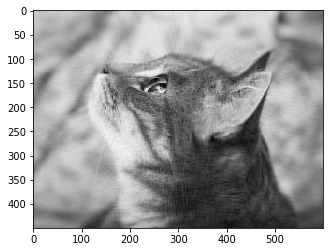

50%的奇异值：


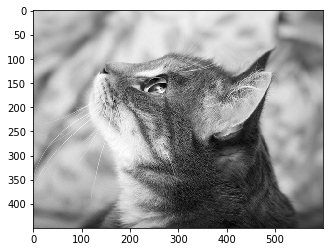

In [23]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	plt.show()
	#print(A-temp)


# 加载图片
image = Image.open('./cat.jpg')

# 转化为灰度图
image = image.convert('L') 
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
print("原图像的大小为: "+str(A.shape))
plt.show()

# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
print("1%的奇异值: ")
get_image_feature(s, 5)
print("10%的奇异值：")      
get_image_feature(s, 45)
print("50%的奇异值：")
get_image_feature(s, 225)

